<a href="https://colab.research.google.com/github/ujin2021/ML_CrashCourse/blob/main/unit3_LinearRegression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear regression with tf.keras

#### Linear Regression with Synthetic Data

In [ ]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
#@title Default title text
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:
# Define the dataset
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 491ms/step - loss: 616.0851 - root_mean_squared_error: 24.8211
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 603.2032 - root_mean_squared_error: 24.5602
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 593.9893 - root_mean_squared_error: 24.3719
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 586.3522 - root_mean_squared_error: 24.2147
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 579.6295 - root_mean_squared_error: 24.0755
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 573.5145 - root_mean_squared_error: 23.9482
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 567.8362 - root_mean_squared_error: 23.8293
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 562.4887 - root_mean_squared_error: 23.7168
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 557.4008 - root_

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


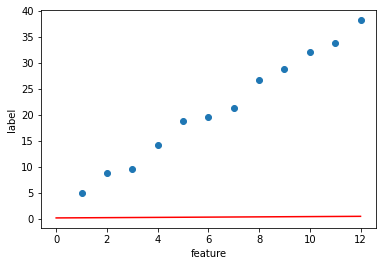

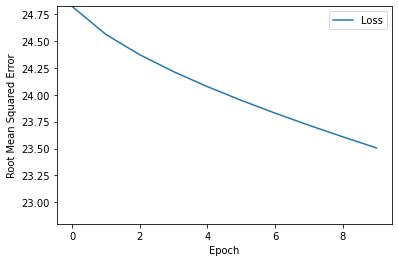

In [ ]:
# Initialize hyperparameters(learning rate, epochs, batch_size)
# Invokes the functions that build and train the model

learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* blue dot : actual data
* red line : output of trained model(blue dot을 따라가야 한다)
* loss 함수는 loss curve가 점점 감소하면서 flattend out되어야 하는데 그렇지 않다-> 학습이 충분히 되지 않았다

In [ ]:
# Increase the number of epoches
epochs = 1000

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


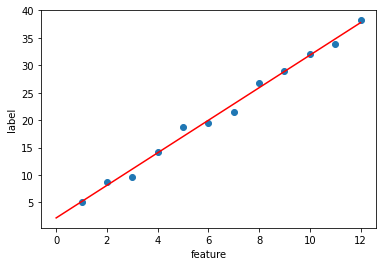

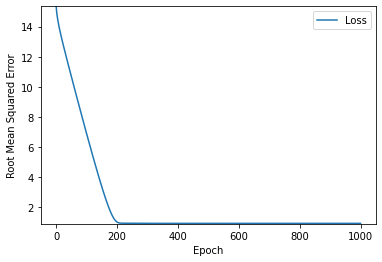

In [ ]:
# learning rate = 0.01, epochs = 1000
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* epochs를 10에서 1000으로 올리니 빨간 선도 파란 점을 따라가고, loss함수도 flattened 되었다

In [ ]:
# Increase the learning rate

learning_rate = 100
epochs = 500
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


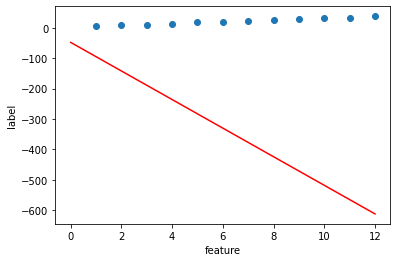

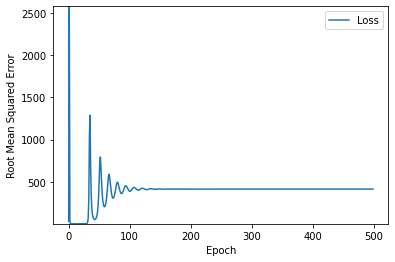

In [ ]:
# learning rate = 100, epochs = 500
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* 빨간선이 전혀 파란점과 맞지 않는다
* loss함수도 롤러코스터 처럼 흔들린다 -> learning rate가 too high

In [ ]:
# Find the ideal combination of epochs and learning rate
learning_rate = 0.14
epochs = 70
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


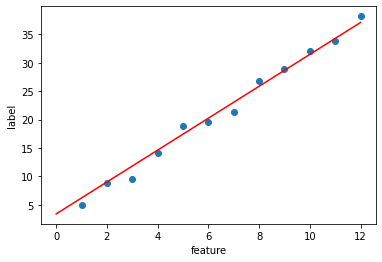

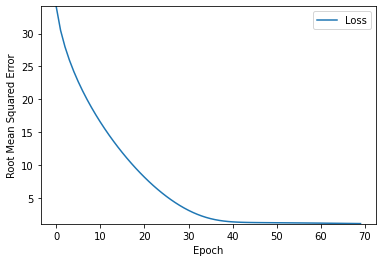

In [ ]:
# learning rate = 0.14, epochs = 70
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* batch size : 만약 batch size가 6이다 -> system이 model의 loss value를 6개의 example을 가지고 재연산 한다

* batch size가 작을수록 더 빠르게 학습된다

* epoch : dataset의 모든 example을 처리하기에 충분한 반복 수. 만약 dataset이 12개이고, batch size가 12이면 1번, batch size가 6이면 2번이 적합

* batch size는 한번의 batch 마다 주는 data sample의 size, batch는 나눠진 data set, iteration은 epoch를나누어서 실행하는 횟수

* 메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수 없으므로 data를 나누어서 주게된다

* 이때 몇번 나누어 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 한다

In [ ]:
learning_rate=0.05
epochs=125
my_batch_size=1 # epoch에 맞게 적합한 batch size를 고른 것. Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


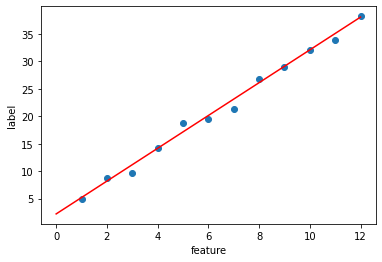

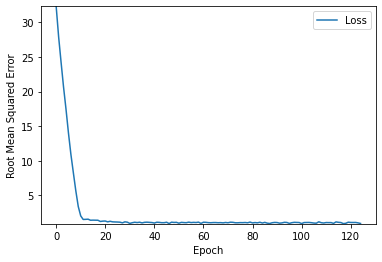

In [ ]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#### Linear Regression with a Real Dataset

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format